In [2]:
from wind_farm_gym import WindFarmEnv

# Initialize the environment with 3 turbines positioned 750 meters apart in a line
env = WindFarmEnv(
    #turbine_layout=([0, 750, 1500, 2800], [0, 0, 0, 50]),
    turbine_layout=([0, 750], [0, 0]),
    observe_yaws=True,
    lidar_observations=None,
    mast_layout=([300, 301],[0, 0]),
    floris="myfloris.json",
)

obs = env.reset()
for i in range(1000):                # Repeat for 1000 steps
    a = env.action_space.sample()    # Choose an action randomly
    print(a)
    obs, reward, _, _ = env.step(a)  # Perform the action
    render = env.render(mode="rgb_array")                     # Render the environment; remove this line to speed up the process
    print(render.shape)
    print(len(obs))
    print(obs)
    if i == 50:
        break
env.close()

[ 0.18686002 -0.80307394]
(142, 640, 3)
6
[0.5027777777777778, 0.49722222222222223, 0.16330256738453708, 0.7476569705475385, 0.1635388954027998, 0.7477494919999674]
[-0.6529716   0.86164016]
(142, 640, 3)
6
[0.5, 0.5, 0.16302980512639292, 0.7486166617675348, 0.16326672537759215, 0.7486712925837313]
[-0.08153567  0.8993328 ]
(142, 640, 3)
6
[0.49722222222222223, 0.5027777777777778, 0.16309136946997407, 0.7495809474413082, 0.16332876493159726, 0.7495974972660766]
[ 0.01813097 -0.7182291 ]
(142, 640, 3)
6
[0.5, 0.5, 0.16302980512639292, 0.7486166617675348, 0.16326672537759215, 0.7486712925837313]
[-0.38589722 -0.32138908]
(142, 640, 3)
6
[0.49722222222222223, 0.49722222222222223, 0.16309136946997407, 0.7495809474413082, 0.16332876493159726, 0.7495974972660766]
[-0.7458203  -0.45360297]
(142, 640, 3)
6
[0.49444444444444446, 0.49444444444444446, 0.16348708078780408, 0.7505418926572628, 0.16372483152992143, 0.7505204921254823]
[-0.39295223 -0.4183217 ]
(142, 640, 3)
6
[0.49166666666666664, 0

AttributeError: 'NoneType' object has no attribute 'close'

In [4]:
import time
import numpy as np
from wind_farm_gym import WindFarmEnv
from PIL import Image 

# Initialize the environment with 3 turbines positioned 750 meters apart in a line

times = []
for i in range(50):
    x = np.random.randint(0, 3000, size=i+1)
    y = np.random.randint(0, 3000, size=i+1)
    env = WindFarmEnv(
        turbine_layout=(x,y),
        floris="myfloris.json"
    )

    t0 = time.time()
    obs = env.reset()
    for j in range(100):                # Repeat for 1000 steps
        a = env.action_space.sample()    # Choose an action randomly
        obs, reward, _, _ = env.step(a)  # Perform the action
        mode = "rgb_array" if j == 0 else "human"
        img = env.render(mode=mode)                     # Render the environment; remove this line to speed up the process
        print(img)
        if j == 0:
            img = Image.fromarray(img)
            img.save(f"render_{i+1}.png")
    try:
        env.close()
    except:
        pass

    curr_t = time.time()-t0
    print(f"Time is {curr_t}")
    times.append(curr_t)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


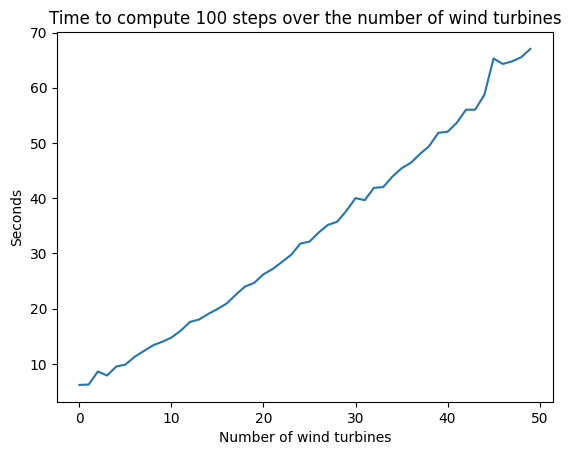

In [5]:
import matplotlib.pyplot as plt

plt.plot(times)
plt.xlabel("Number of wind turbines")
plt.ylabel("Seconds")
plt.title("Time to compute 100 steps over the number of wind turbines")
plt.savefig("env_speed.png")

In [6]:
timesave = times

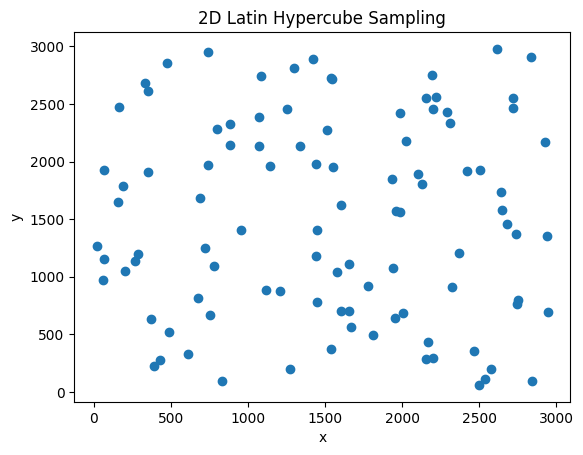

In [3]:
import scipy
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

# 2d latin hypercube sampling

def lhs(n, d):
    return scipy.stats.distributions.uniform(loc=0, scale=1).rvs((n, d))

#explanation of previous function:
# scipy.stats.distributions.uniform(loc=0, scale=1) is a uniform distribution between 0 and 1
# rvs((n, d)) generates n samples of d dimensions

def lhs_sample(n, d, bounds):
    samples = lhs(n, d)
    for i in range(d):
        samples[:,i] = samples[:,i]*(bounds[i][1]-bounds[i][0])+bounds[i][0]
    return samples

bounds = [(0, 3000), (0, 3000)]
n = 100
d = 2
samples = lhs_sample(n, d, bounds)

# plot and show without saving
plt.scatter(samples[:,0], samples[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Latin Hypercube Sampling")
plt.show()



[[0.36370088 0.91624612]
 [0.94261971 0.78666599]
 [0.75369812 0.86007252]
 [0.67640847 0.61538065]
 [0.22269451 0.53773542]
 [0.08014604 0.03801419]
 [0.10587125 0.11936944]
 [0.50280765 0.49991837]
 [0.82702648 0.31506243]
 [0.47703347 0.21226595]]


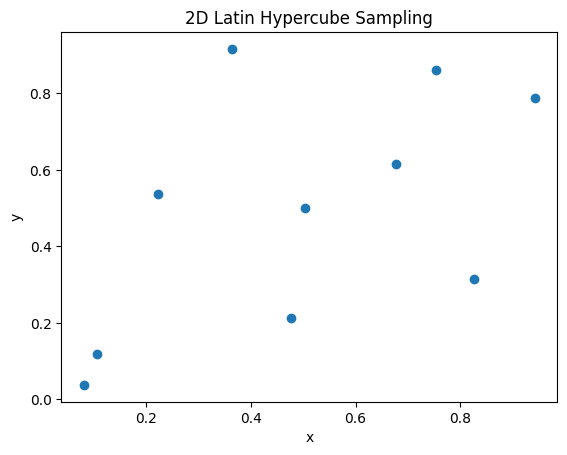

In [11]:
from scipy.stats import qmc

sampler = qmc.LatinHypercube(d=2)
sample = sampler.random(n=10)
print(sample)
# plot and show without saving
plt.scatter(sample[:,0], sample[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Latin Hypercube Sampling")
plt.show()

In [8]:
1e3


1000.0